<a href="https://colab.research.google.com/github/Heart-n-Soul/house-prediction-ai/blob/main/Pred.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [41]:
# Enabling Print for all lines
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

# Working directory
import os
os.getcwd()

import warnings
warnings.filterwarnings(action = "ignore")

'/content'

In [43]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [44]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
get_ipython().run_line_magic('matplotlib', 'inline')
import sklearn

from sklearn.linear_model import LinearRegression,Ridge
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import accuracy_score, r2_score
from sklearn.model_selection import train_test_split

In [48]:
csv_file_path = '/content/housing.csv'
housing = pd.read_csv(csv_file_path)
housing['longitude'] = housing['longitude'].astype(float)


In [49]:
print("The number of rows and columns are {} and also called shape of the matrix".format(housing.shape))
print("Columns names are \n {}".format(housing.columns))

The number of rows and columns are (20640, 10) and also called shape of the matrix
Columns names are 
 Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'ocean_proximity'],
      dtype='object')


In [ ]:
 housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [ ]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [50]:
housing.dropna(inplace=True)

In [ ]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
Index: 20433 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20433 non-null  float64
 1   latitude            20433 non-null  float64
 2   housing_median_age  20433 non-null  float64
 3   total_rooms         20433 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20433 non-null  float64
 6   households          20433 non-null  float64
 7   median_income       20433 non-null  float64
 8   median_house_value  20433 non-null  float64
 9   ocean_proximity     20433 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.7+ MB


<Figure size 1000x600 with 0 Axes>

<Axes: xlabel='median_house_value'>

Text(0.5, 1.0, 'Violin Plot of Prices')

Text(0.5, 0, 'Price (USD)')

Text(0, 0.5, 'Frequency')

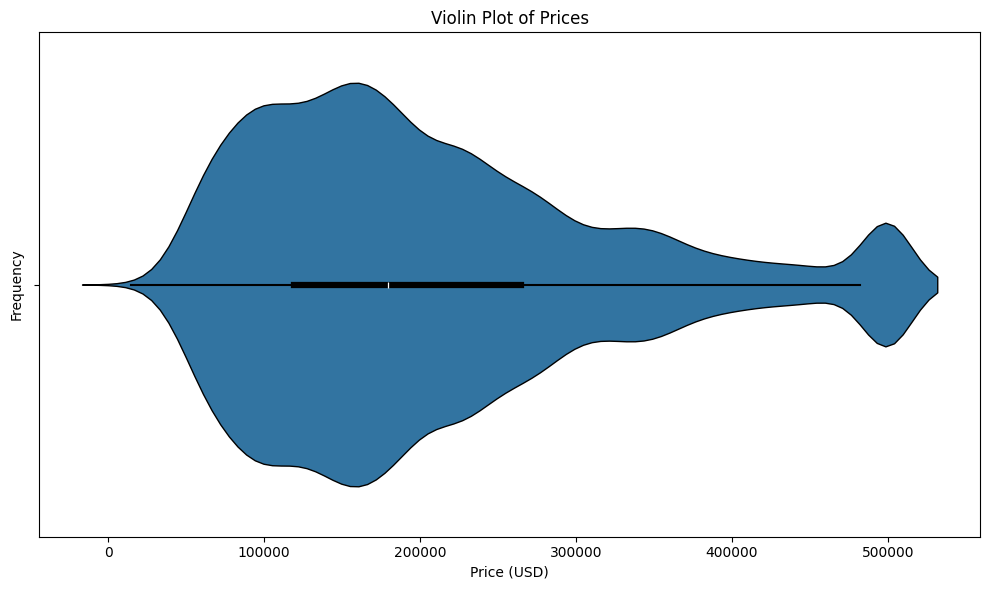

In [ ]:
plt.figure(figsize=(10,6))
sns.violinplot(data=housing, x=housing["median_house_value"], linewidth=1, linecolor="k")
plt.title("Violin Plot of Prices")
plt.xlabel("Price (USD)")
plt.ylabel("Frequency")
plt.tight_layout()
plt.show()

In [51]:
X = housing.drop(["median_house_value"],axis=1)
y = housing["median_house_value"]

In [52]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [53]:
train_data = X_train.join(y_train)

In [ ]:
train_data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
17727,-121.80,37.32,14.0,4412.0,924.0,2698.0,891.0,4.7027,<1H OCEAN,227600.0
2057,-119.63,36.64,33.0,1036.0,181.0,620.0,174.0,3.4107,INLAND,110400.0
6453,-118.06,34.12,25.0,3891.0,848.0,1848.0,759.0,3.6639,INLAND,248100.0
4619,-118.31,34.07,28.0,2362.0,949.0,2759.0,894.0,2.2364,<1H OCEAN,305600.0
15266,-117.27,33.04,27.0,1839.0,392.0,1302.0,404.0,3.5500,NEAR OCEAN,214600.0
...,...,...,...,...,...,...,...,...,...,...
11397,-117.97,33.72,24.0,2991.0,500.0,1437.0,453.0,5.4286,<1H OCEAN,273400.0
12081,-117.54,33.76,5.0,5846.0,1035.0,3258.0,1001.0,4.7965,<1H OCEAN,160800.0
5447,-118.42,34.01,42.0,1594.0,369.0,952.0,362.0,3.0990,<1H OCEAN,335400.0
866,-122.04,37.57,12.0,5719.0,1064.0,3436.0,1057.0,5.2879,NEAR BAY,231200.0


array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>],
       [<Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>,
        <Axes: title={'center': 'median_house_value'}>]], dtype=object)

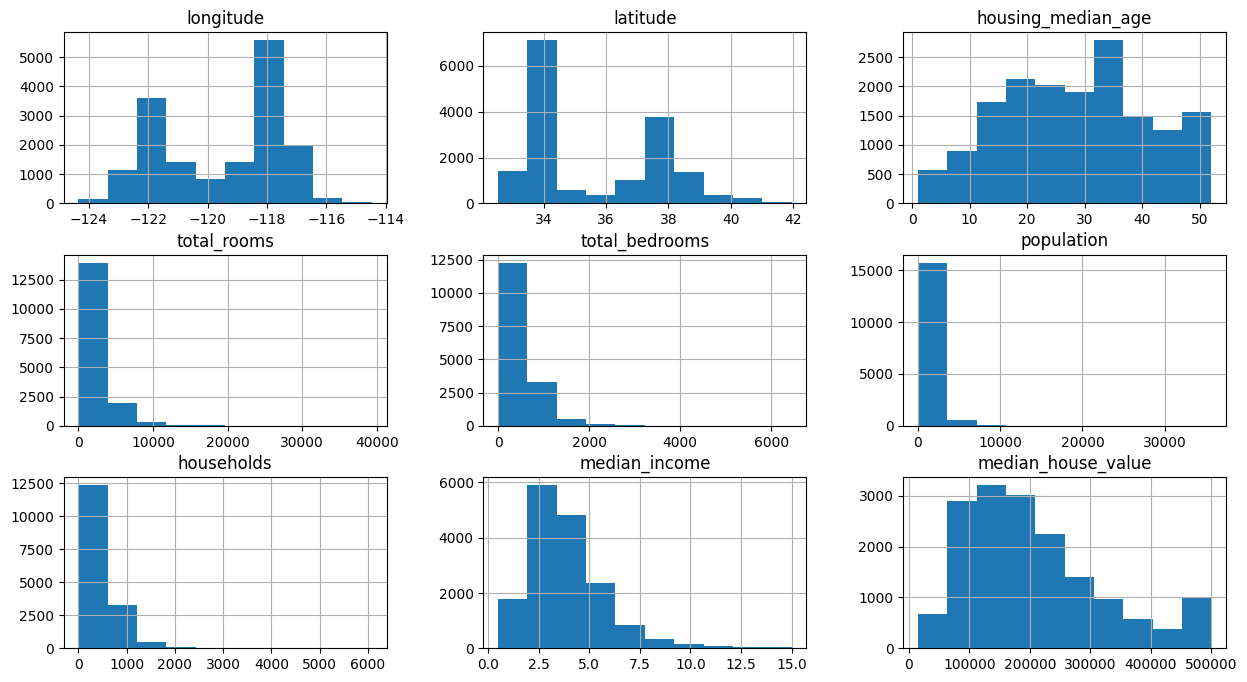

In [ ]:
train_data.hist(figsize=(15,8))

In [ ]:
labelEncoder = LabelEncoder()
print(housing["ocean_proximity"].value_counts())
housing["ocean_proximity"] = labelEncoder.fit_transform(housing["ocean_proximity"])
housing["ocean_proximity"].value_counts()
housing.describe()

ocean_proximity
0    9034
1    6496
4    2628
3    2270
2       5
Name: count, dtype: int64


ocean_proximity
0    9034
1    6496
4    2628
3    2270
2       5
Name: count, dtype: int64

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
count,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000
mean,-119.570689,35.633221,28.633094,2636.504233,537.870553,1424.946949,499.433465,3.871162,206864.413155,1.166153
std,2.003578,2.136348,12.591805,2185.269567,421.385070,1133.208490,382.299226,1.899291,115435.667099,1.420135
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000,0.000000
25%,-121.800000,33.930000,18.000000,1450.000000,296.000000,787.000000,280.000000,2.563700,119500.000000,0.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.536500,179700.000000,1.000000
75%,-118.010000,37.720000,37.000000,3143.000000,647.000000,1722.000000,604.000000,4.744000,264700.000000,1.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000,4.000000


In [ ]:
numerical_list = [x for x in housing.columns if housing[x].dtype in ('int64','float64')]
print(numerical_list)

['longitude', 'latitude', 'housing_median_age', 'total_rooms', 'total_bedrooms', 'population', 'households', 'median_income', 'median_house_value', 'ocean_proximity']


<Figure size 1200x800 with 0 Axes>

<Axes: >

Text(0.5, 1.0, 'Correlation Heatmap')

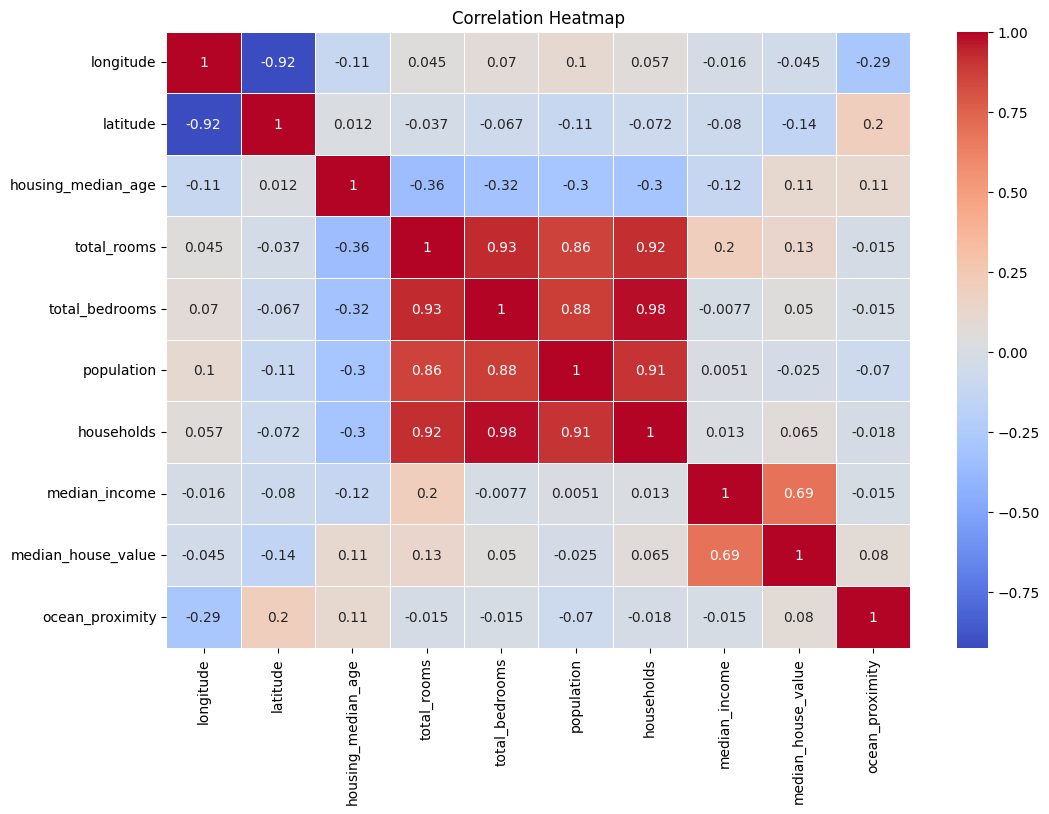

In [ ]:
cor_matrix= housing[numerical_list].corr()
plt.figure(figsize=(12, 8))  # Set the figure size
sns.heatmap(cor_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

In [54]:
train_data["total_rooms"] = np.log(train_data["total_rooms"] + 1)
train_data["total_bedrooms"] = np.log(train_data["total_bedrooms"] + 1)
train_data["population"] = np.log(train_data["population"] + 1)
train_data["households"] = np.log(train_data["households"] + 1)

array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>],
       [<Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>,
        <Axes: title={'center': 'median_house_value'}>]], dtype=object)

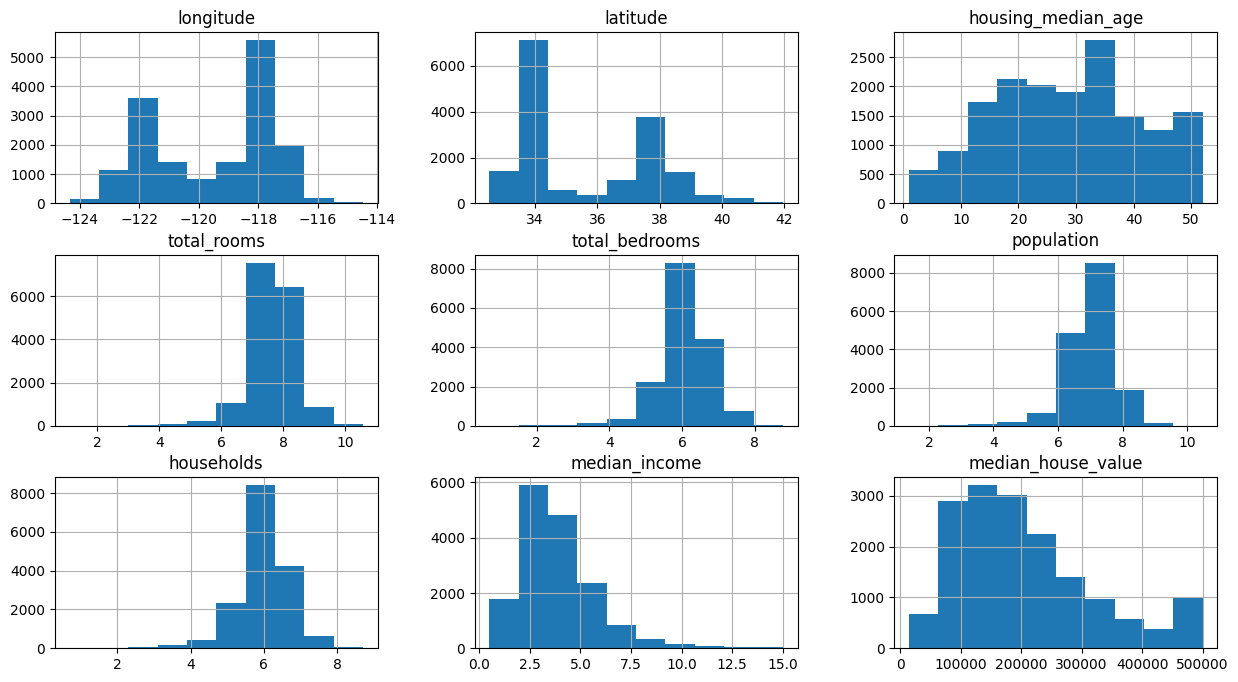

In [ ]:
train_data.hist(figsize=(15,8))

<Figure size 1500x800 with 0 Axes>

<Axes: xlabel='latitude', ylabel='longitude'>

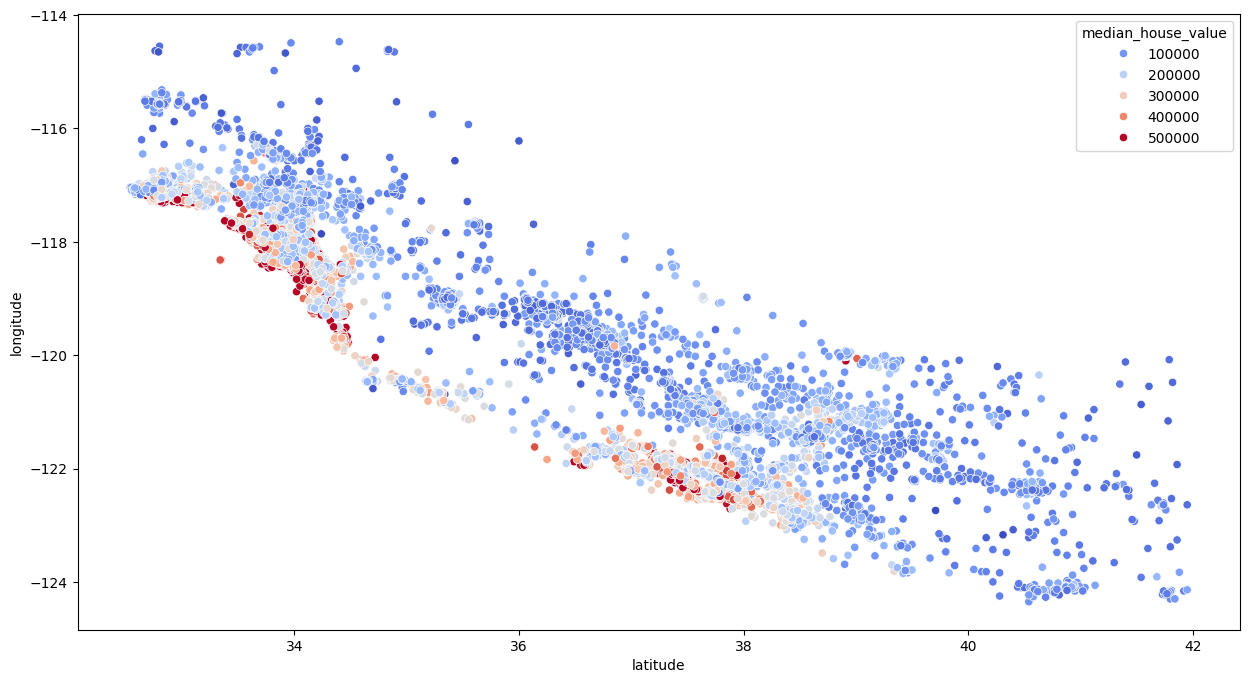

In [ ]:
plt.figure(figsize=(15,8))
sns.scatterplot(x = "latitude", y = "longitude", data = train_data, hue="median_house_value", palette="coolwarm")
plt.show()

In [55]:
train_data["bedroom_ratio"] = train_data["total_bedrooms"] / train_data["total_rooms"]
train_data["household_rooms"] = train_data["total_rooms"] / train_data["households"]

<Figure size 1500x800 with 0 Axes>

<Axes: >

Text(0.5, 1.0, 'Correlation Heatmap')

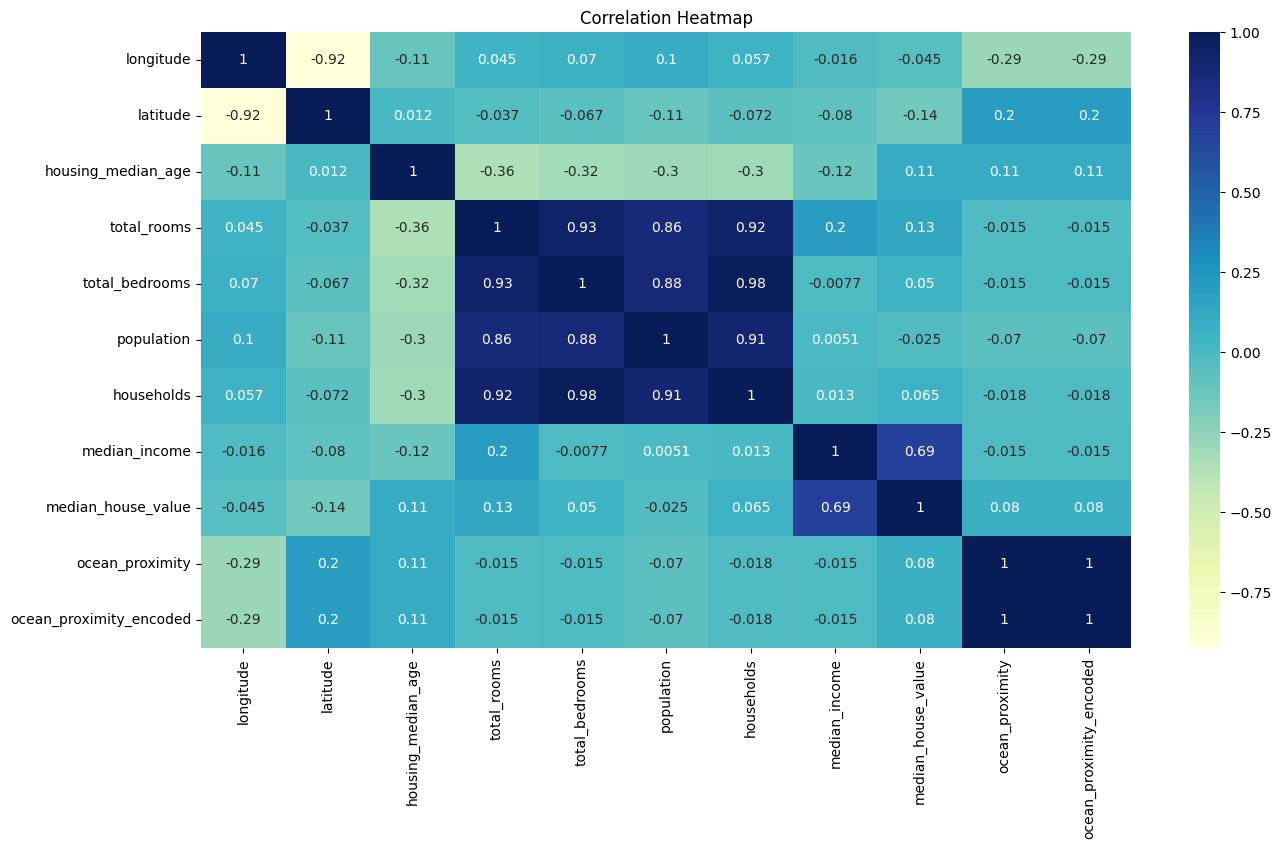

In [ ]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()

housing['ocean_proximity_encoded'] = label_encoder.fit_transform(housing['ocean_proximity'])


plt.figure(figsize=(15,8))
sns.heatmap(housing.corr(), annot=True, cmap="YlGnBu")
plt.title('Correlation Heatmap')
plt.show()

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print("X_train shape {} and size {}".format(X_train.shape,X_train.size))
print("X_test shape {} and size {}".format(X_test.shape,X_test.size))
print("y_train shape {} and size {}".format(y_train.shape,y_train.size))
print("y_test shape {} and size {}".format(y_test.shape,y_test.size))

X_train shape (16346, 9) and size 147114
X_test shape (4087, 9) and size 36783
y_train shape (16346,) and size 16346
y_test shape (4087,) and size 4087


In [ ]:
X_train.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
17727,-121.80,37.32,14.0,4412.0,924.0,2698.0,891.0,4.7027,<1H OCEAN
2057,-119.63,36.64,33.0,1036.0,181.0,620.0,174.0,3.4107,INLAND
6453,-118.06,34.12,25.0,3891.0,848.0,1848.0,759.0,3.6639,INLAND
4619,-118.31,34.07,28.0,2362.0,949.0,2759.0,894.0,2.2364,<1H OCEAN
15266,-117.27,33.04,27.0,1839.0,392.0,1302.0,404.0,3.5500,NEAR OCEAN


In [ ]:

# Assuming 'X_train' and 'X_test' are pandas DataFrames containing your data
# Replace 'categorical_columns' with the actual names of your categorical columns
categorical_columns = ['ocean_proximity']

# Perform one-hot encoding
X_train_encoded = pd.get_dummies(X_train, columns=categorical_columns)
X_test_encoded = pd.get_dummies(X_test, columns=categorical_columns)

# Now, you can apply StandardScaler
from sklearn.preprocessing import StandardScaler

independent_scaler = StandardScaler()

X_train_scaled = independent_scaler.fit_transform(X_train_encoded)
X_test_scaled = independent_scaler.transform(X_test_encoded)

print("Scaled X_train:")
print(X_train_scaled[0:5, :])
print("\nScaled X_test:")
print(X_test_scaled[0:5, :])





Scaled X_train:
[[-1.10651441  0.78620804 -1.16206244  0.82931106  0.92929666  1.13110981
   1.04074393  0.43841173  1.1227399  -0.67879934 -0.01354861 -0.35636982
  -0.38540693]
 [-0.02467137  0.46787317  0.34865716 -0.73855806 -0.85052345 -0.7088994
  -0.85615229 -0.24238852 -0.89067824  1.47318941 -0.01354861 -0.35636982
  -0.38540693]
 [ 0.75804456 -0.71183841 -0.2874353   0.58735021  0.74724238  0.37845927
   0.69152454 -0.10896853 -0.89067824  1.47318941 -0.01354861 -0.35636982
  -0.38540693]
 [ 0.63340827 -0.73524539 -0.04890063 -0.12274217  0.98918293  1.18512356
   1.04868073 -0.86116849  1.1227399  -0.67879934 -0.01354861 -0.35636982
  -0.38540693]
 [ 1.15189525 -1.21742909 -0.12841219 -0.36563185 -0.34508329 -0.10500803
  -0.24766396 -0.16898645 -0.89067824 -0.67879934 -0.01354861 -0.35636982
   2.59466012]]

Scaled X_test:
[[ 1.16685161 -1.33446397 -0.68499309 -0.77338928 -0.6181647  -0.79301917
  -0.64450418 -0.36195011 -0.89067824 -0.67879934 -0.01354861 -0.35636982
   2.

In [ ]:
# Train a linear regression model
linear_reg_model = LinearRegression()
linear_reg_model.fit(X_train_scaled, y_train)

# Make predictions on the training set
train_predictions = linear_reg_model.predict(X_train_scaled)

# Make predictions on the test set
test_predictions = linear_reg_model.predict(X_test_scaled)

# Evaluate the model
train_r2_score = r2_score(y_train, train_predictions)
test_r2_score = r2_score(y_test, test_predictions)

print("Train R2 Score:", train_r2_score)
print("Test R2 Score:", test_r2_score)








LinearRegression()

Train R2 Score: 0.6456482397646103
Test R2 Score: 0.6488402154431991


Mean Squared Error: 4802173538.604162
Mean Absolute Error: 50413.433308100364


<Figure size 1000x600 with 0 Axes>

Text(0.5, 0, 'Actual Values')

Text(0, 0.5, 'Predicted Values')

Text(0.5, 1.0, 'Actual vs. Predicted House Prices')

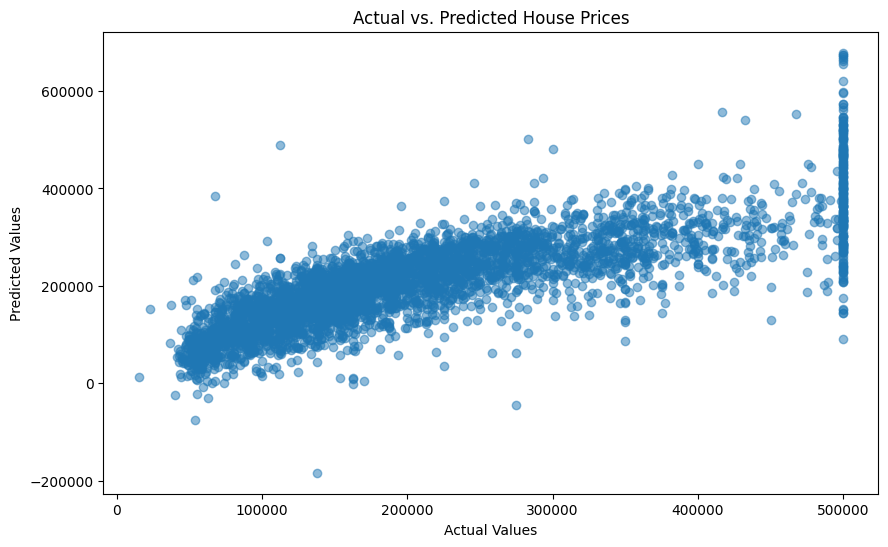

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Evaluate the model using other metrics
y_pred = linear_reg_model.predict(X_test_scaled)
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
print("Mean Squared Error:", mse)
print("Mean Absolute Error:", mae)

# Plot actual vs. predicted values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs. Predicted House Prices")
plt.show()


In [ ]:
y_pred = linear_reg_model.predict(X_test_scaled)

# Display the predictions
print("Predictions:", y_pred)

Predictions: [201882.95986765 147279.68214385 207796.60979847 ... 110229.93045317
 137315.7328207  169083.81714047]


In [ ]:
print(len(y_pred))
print(len(y_test))
print(y_pred[5:10])
print(y_test[5:10])

4087
4087
[ 95437.89710398 287156.45161243 257624.77180537 385383.55615124
  62548.19755136]
16260     75000.0
18011    269400.0
10086    228900.0
18294    500001.0
18733     80800.0
Name: median_house_value, dtype: float64
